<a href="https://colab.research.google.com/gist/Anacrishc/02a8f62dea521f02286e6e42e1dfa3e8/data-analysis-hotel-bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis - Hotel Bookings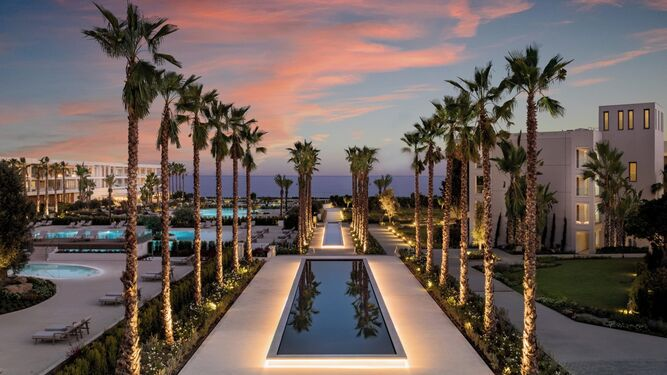

*Dataset:* https://www.kaggle.com/datasets/mojtaba142/hotel-booking/data

This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

## Business Problem

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.
The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.


**Problema de Negocio:**

En los últimos años, el City Hotel y el Resort Hotel han experimentado altas tasas de cancelación. Cada hotel se enfrenta actualmente a diversos problemas, que incluyen ingresos reducidos y un uso de las habitaciones de hotel menos óptimo. En consecuencia, reducir las tasas de cancelación es el principal objetivo de ambos hoteles para aumentar su eficiencia en la generación de ingresos y para que podamos ofrecer asesoramiento comercial completo para abordar este problema. El análisis de las cancelaciones de reservas de hotel, así como otros factores que no afectan a su negocio y generación de ingresos anual, son los temas principales de este informe.

## Research Question

1.	What are the variables that affect hotel reservation cancellations?
2.	How can we make hotel reservations cancellations better?
3.	How will hotels be assisted in making pricing and promotional decisions?



1. ¿Cuáles son las variables que afectan las cancelaciones de reservas de hotel?
2. ¿Cómo podemos mejorar las cancelaciones de reservas de hotel?
3. ¿Cómo se asistirá a los hoteles en la toma de decisiones sobre precios y promociones?

## Hypothesis

1.	More cancellations occur when prices are higher.
2.	When there is a longer waiting list, customers tend to cancel more frequently.
3.	The majority of clients are coming from offline travel agents to make their reservations.


1. Se producen más cancelaciones cuando los precios son más altos.
2. Cuando hay una lista de espera más larga, los clientes tienden a cancelar con más frecuencia.
3. La mayoría de los clientes provienen de agentes de viajes offline para realizar sus reservas.

## Definition of the columns


*   **is_canceled** : Value indicating if the booking was canceled (1) or not (0).

*   **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

*   **arrival_date_year**: Year of arrival date.


*   **arrival_date_month** :
Month of arrival date with 12 categories: “January” to “December”.

*   **arrival_date_week_number**:
Week number of the arrival date.

*   **arrival_date_day_of_month**:
Day of the month of the arrival date.

*   **stays_in_weekend_nights**:
Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

*   **stays_in_week_nights**:
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting.

*   **adults** : Number of adults.

*   **children**: Number of children.

*   **babies**: Number of babies.

*   **meal** : BB Bed & Breakfast - HB.

*   **country** : Country of origin.

*   **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

*   **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

*   **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0).

*   **previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

*   **previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking.

*   **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

*   **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due.

*   **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS

*   **deposit_type**: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a

*   **agent**: ID of the travel agency that made the booking


*   **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for


*   **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer


*   **customer_type**: Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is


*   **adr**: Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)


*   **required_car_parking_spaces**: Number of car parking spaces required by the customer


*   **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)


*   **reservation_status**: Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform


*   **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to



Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Loading th dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Analítica_de_Datos/Hotel/hotel_bookings 2 (1).csv')

##  1. Exploratory Data Analysis and Data cleaning

In [ ]:
display(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
for col in df.describe(include ='object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(['company','agent'], axis = 1, inplace=True)
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

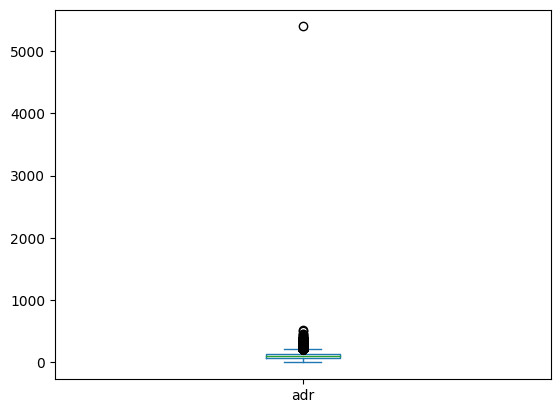

In [ ]:
df['adr'].plot(kind ='box')

In [ ]:
df =df[df['adr']<5000]

## 2. Data Analysis and Visualizations

In [ ]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


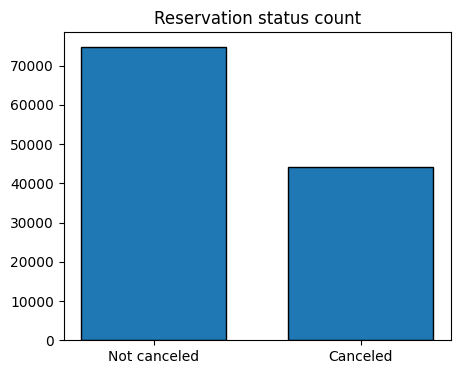

In [ ]:
print(cancelled_perc)
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

Text(0, 0.5, 'number of reservation ')

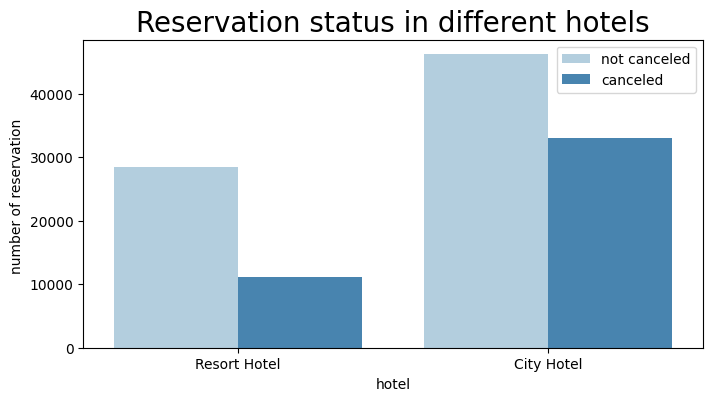

In [ ]:
plt.figure(figsize = (8,4))
axl = sns.countplot(x = 'hotel', hue ='is_canceled', data = df, palette = 'Blues')
legend_labels,_= axl. get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.legend(['not canceled', 'canceled'])
plt.ylabel('number of reservation ')

In [ ]:
resort_hotel = df[df['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [ ]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

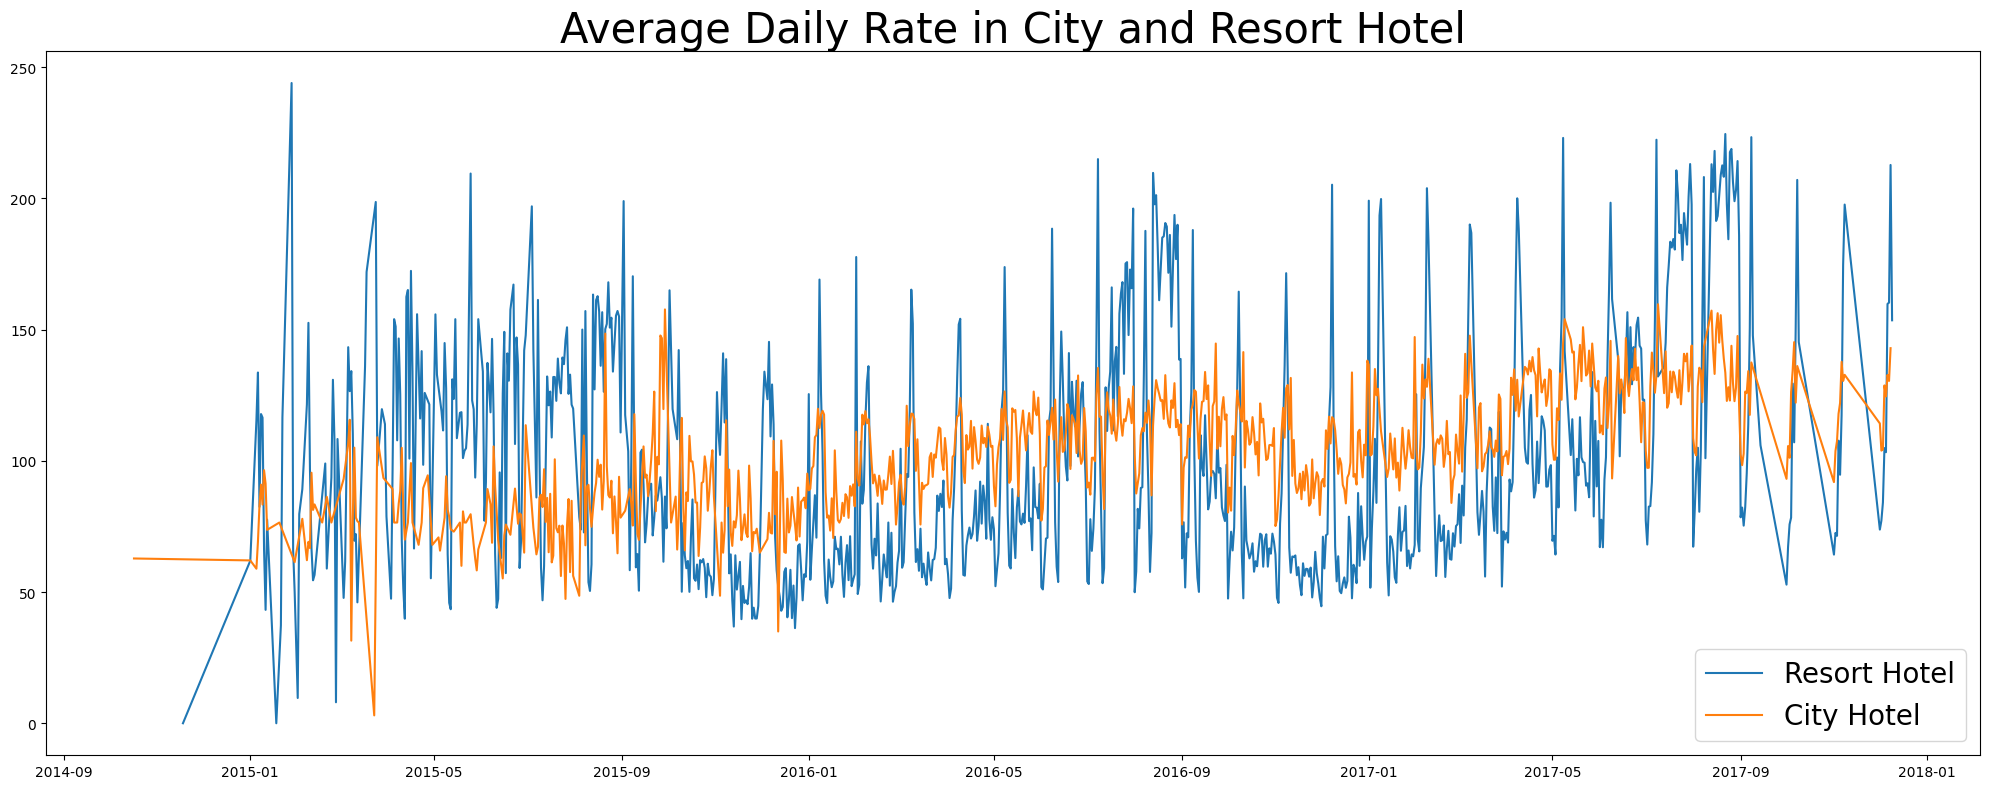

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=20)

# Añadir ajuste de diseño para mejorar la distribución del espacio
plt.tight_layout()

plt.show()


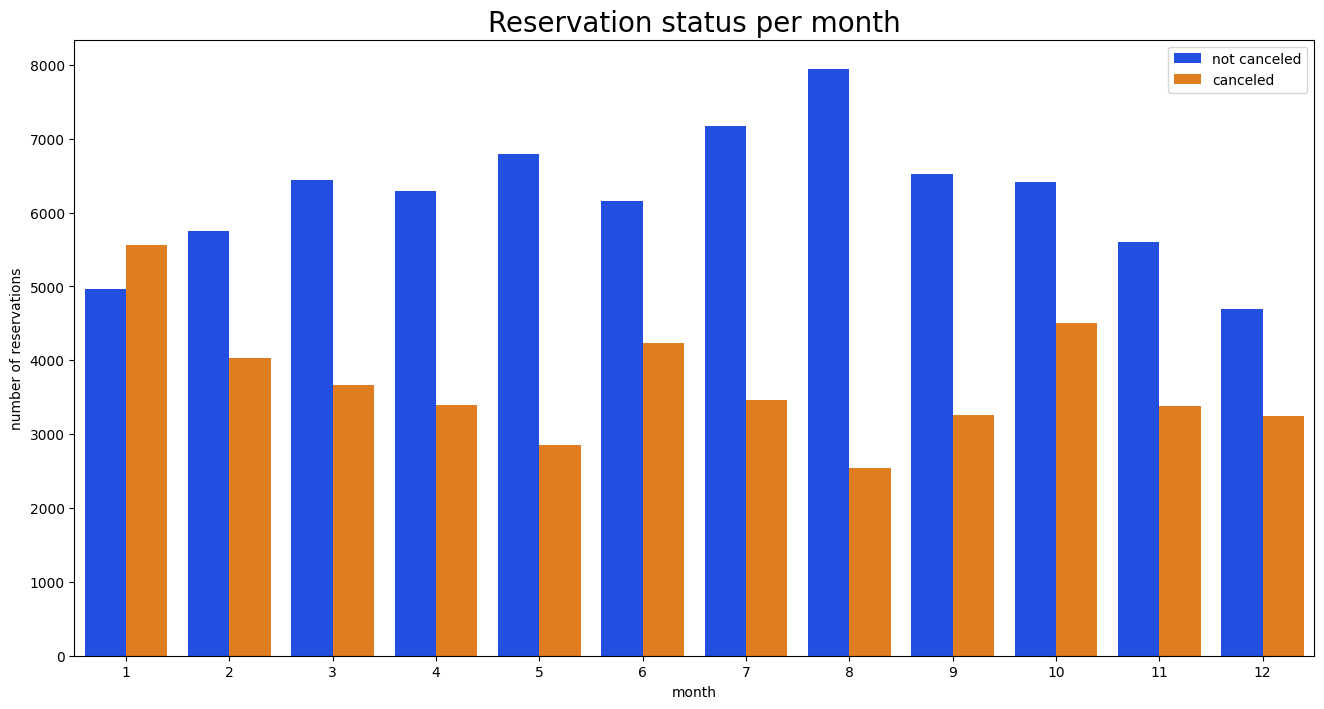

In [ ]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
axl = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
legend_labels,_ = axl. get_legend_handles_labels()
axl.legend(bbox_to_anchor= (1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

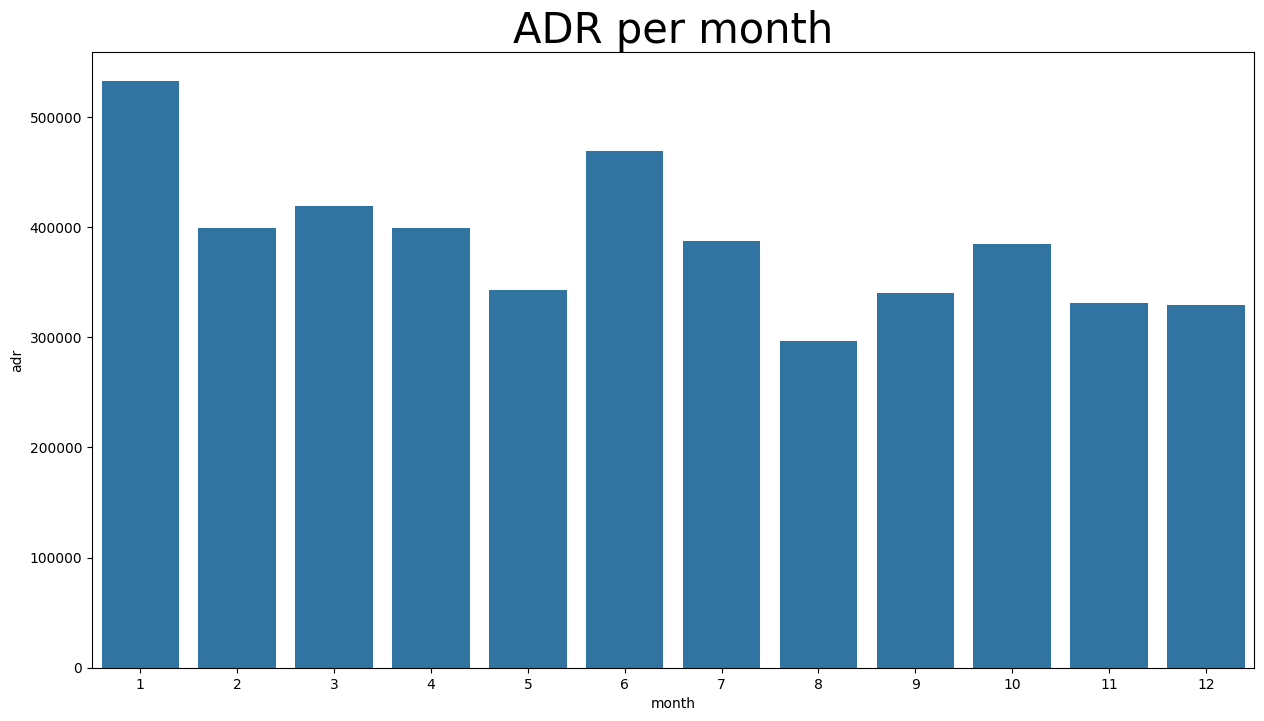

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30)

# Agrupar por mes y sumar la columna 'adr'
monthly_adr_sum = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()

# Utilizar sns.barplot con los datos agregados
sns.barplot(x='month', y='adr', data=monthly_adr_sum)

plt.show()


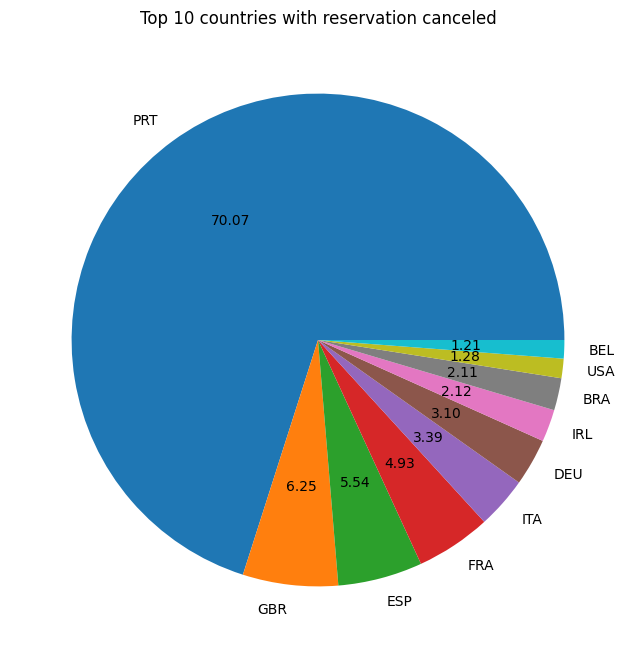

In [ ]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [ ]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [ ]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

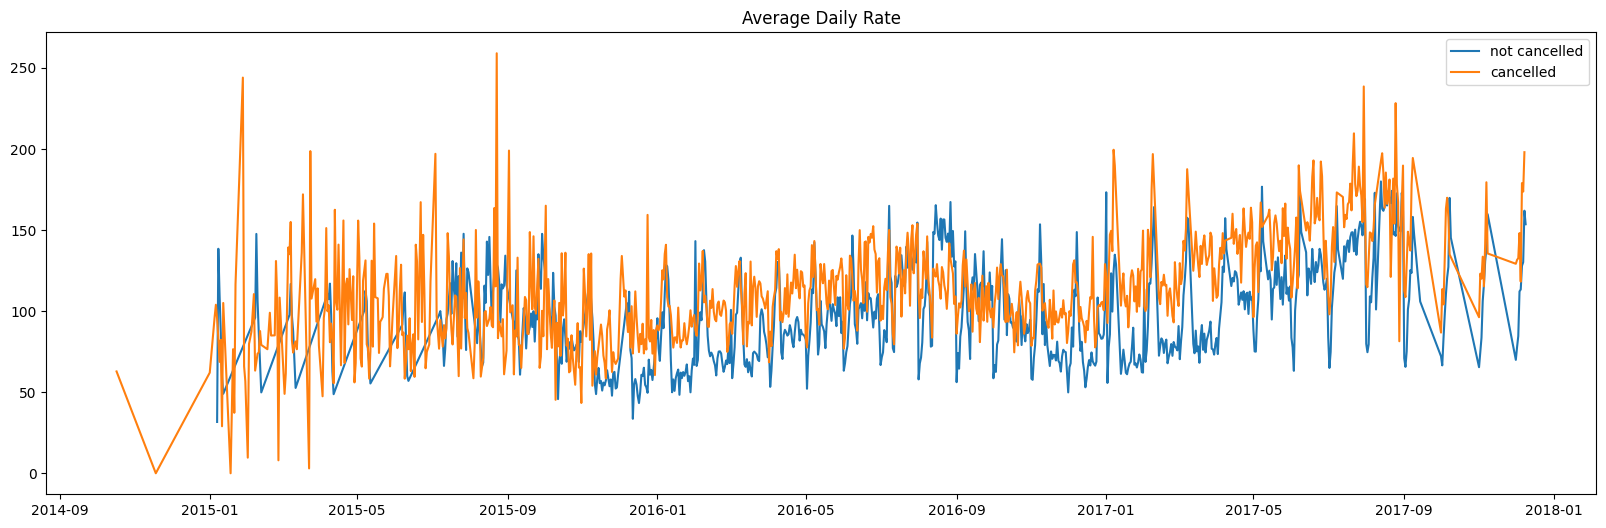

In [ ]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data =df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

In [ ]:

cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] < '2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date'] < '2017-09')]

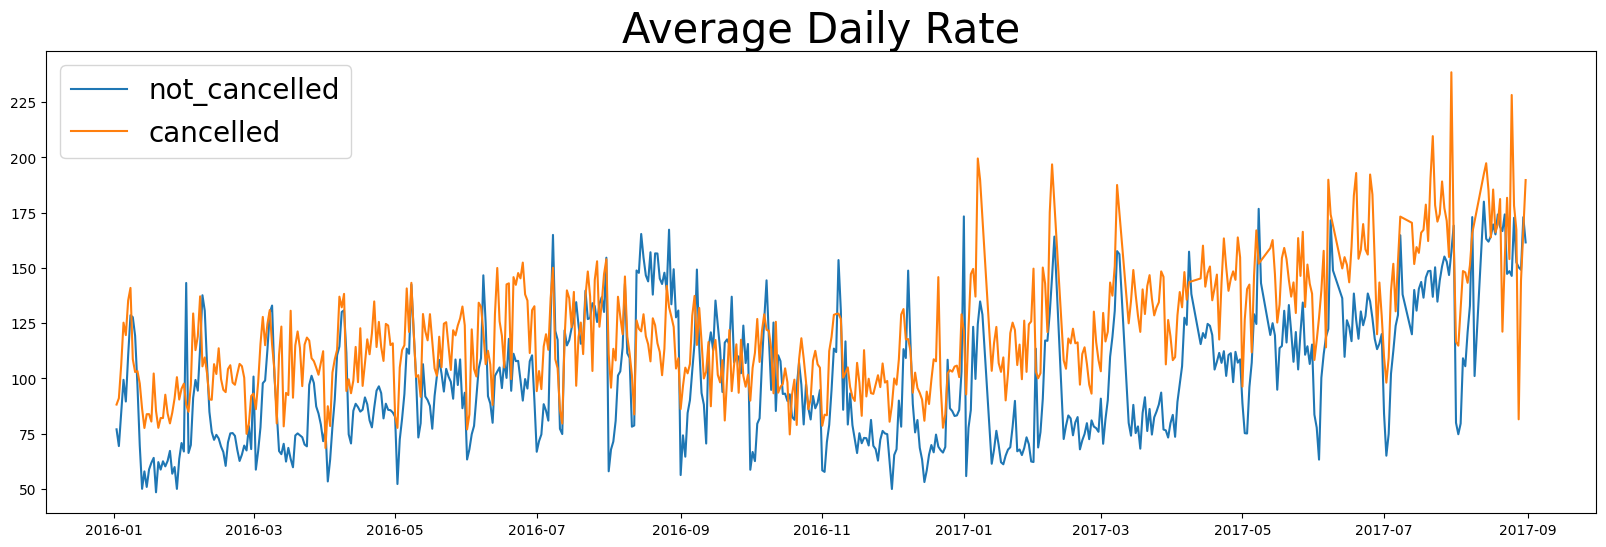

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'],label = 'not_cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'],label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

# Analysis and Findings

1.- The accompanying bar graph shows the percentage of reservations that are canceled and those that are not. It is obvious that there are still a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservations, which has a significant impact on the hotel´s earnings.

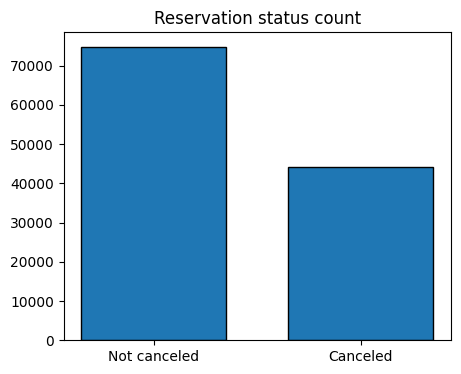

2.- In comparison to resort hotels, city hotels have more bookings. Its possible that the resort hotels are more expensive than those in cities.

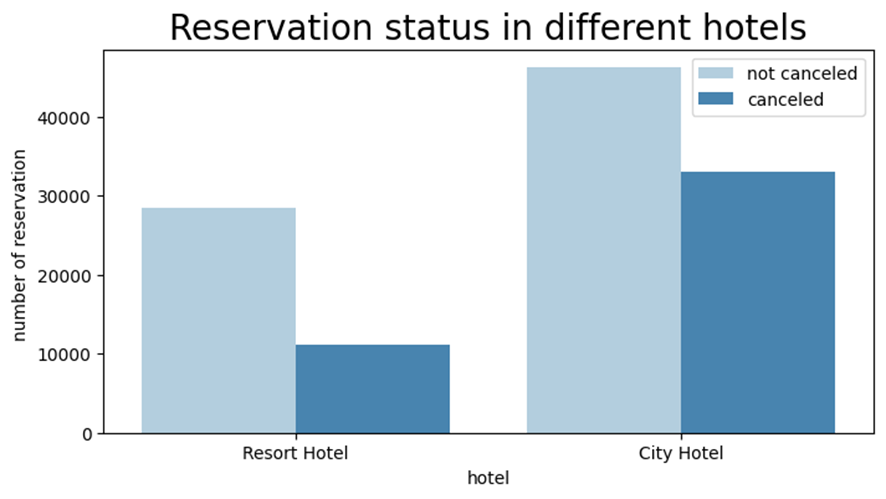

3.- The line graph above shows that, on certain days, the average daily rate for a city hotel is less that that of a resort hotel, and on other days. Its even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates.

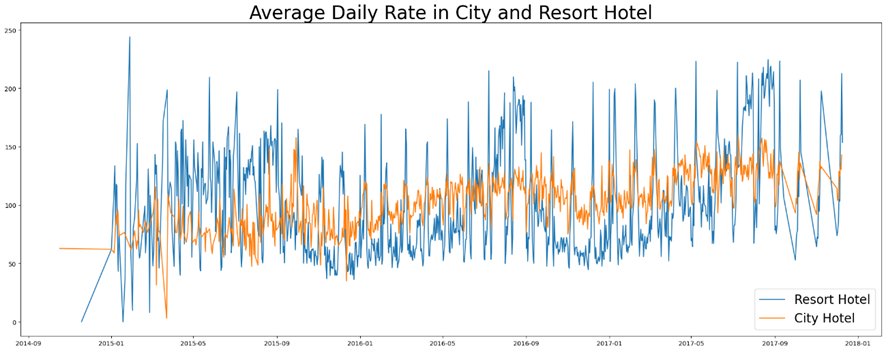

4.- I have developed the groped bar graph to analyze the months with the highest and lowest reservation levels according to reservation statUs. As can be seen, both the number of confirmed reservations and the number of canceled reservations is largest in the month of August whereas January is the month with the most canceled reservations.

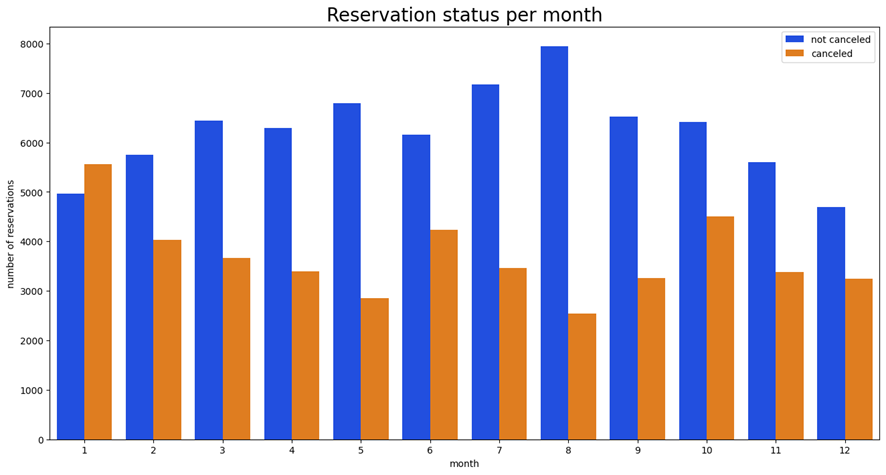

5.- This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accommodation is solely responsible for the cancellation.

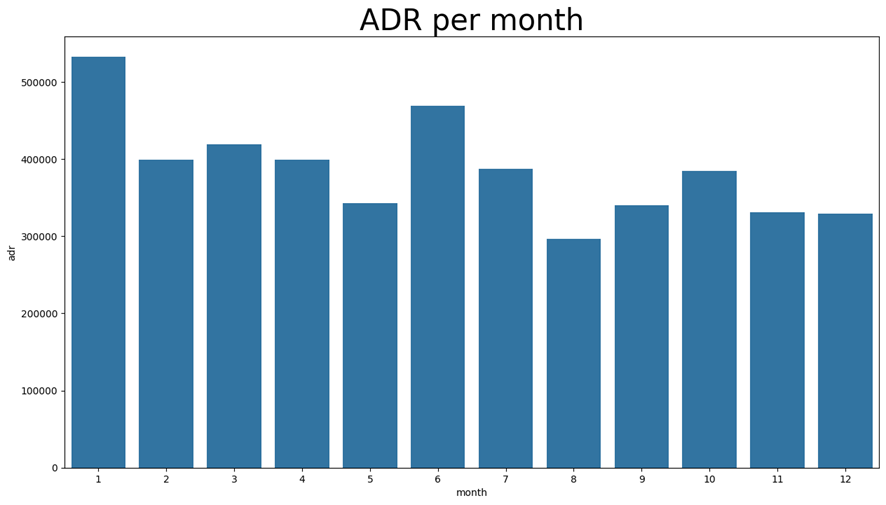

6.- Now, lets see which country has the highest reservation canceled. The top country is Portugal with the highest number of cancellations.

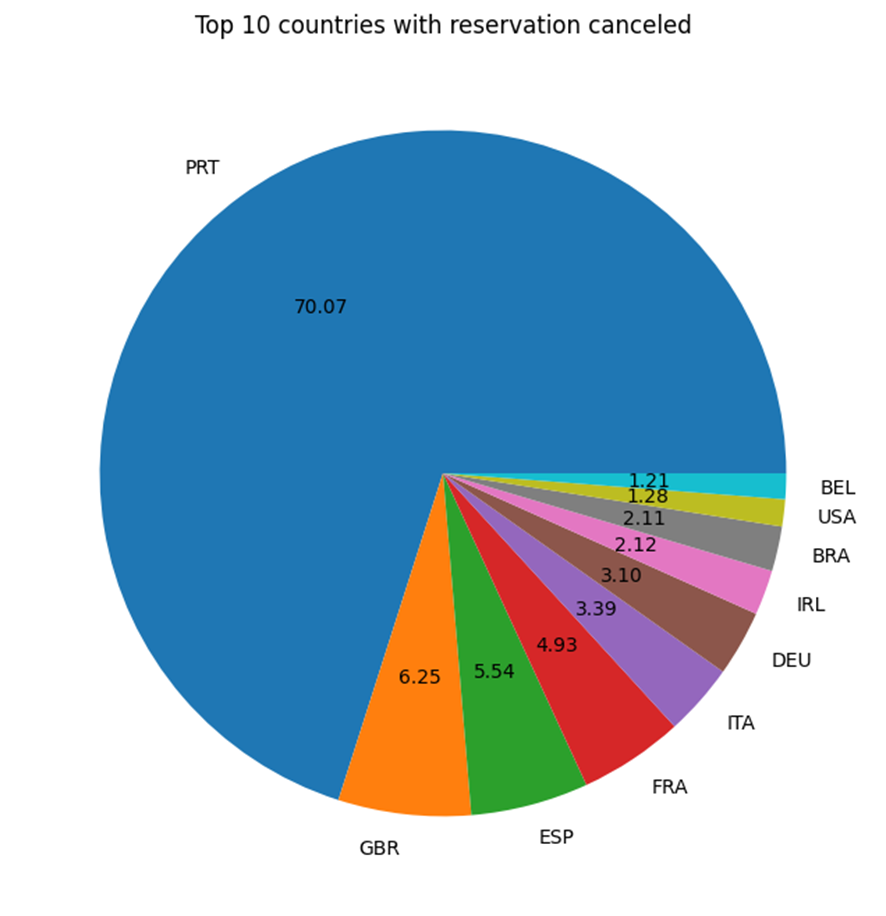

7.- The origin of customers and how they make reservations are also crucial factors to understand the landscape. Approximately 46% of the canceled bookings come from online travel agencies, while 27% originate from groups. Only 4% of customers choose to book directly, contributing to the canceled reservations

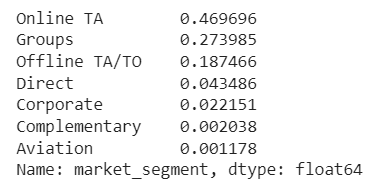

8.- As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves all the above analysis, that the higher price leads to higher cancellation.

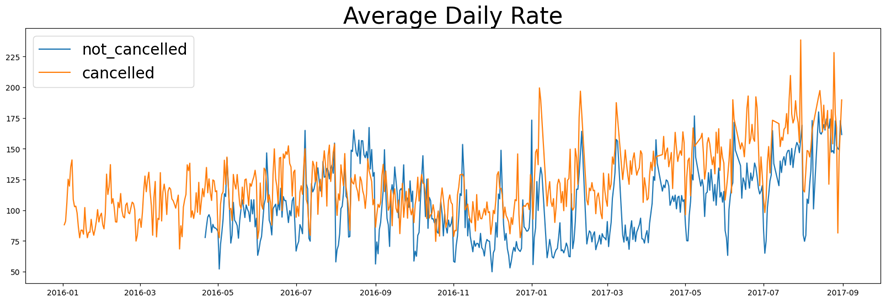

# Suggestions



*   Cancellation rates tend to increase with higher prices. To mitigate cancellations, hotels can refine their pricing strategies by offering lower rates for specific locations. Providing discounts to consumers could also be a viable approach.

*   The resort hotel exhibits a higher ratio of cancellations compared to city hotels. To address this, hotels should consider offering reasonable discounts on room prices during weekends or holidays.

*   Initiating campaigns or marketing efforts in January with attractive offers could be beneficial, considering the highest cancellation rates observed during this month.

*   Improving the overall quality of hotels and services, particularly in Portugal, may contribute to a reduction in cancellation rates.


The 46.96% of cancellations originate from online travel agencies (Online TA), here are strategies to consider:

* Direct Booking Incentives: Hotels could offer special deals or exclusive discounts for guests who book directly through the hotel's website instead of using online travel agencies. This could encourage customers to book directly, thereby reducing cancellation rates.

* Loyalty Programs: Introducing loyalty programs that provide additional benefits, such as exclusive discounts, free room upgrades, or additional services, to guests who are program members and book directly with the hotel.

* Website Experience Enhancement: Ensure that the hotel's website booking process is easy, fast, and appealing. Providing detailed information about services, flexible cancellation policies, and attractive photos could persuade customers to book directly.

* Awareness Campaigns: Launch awareness campaigns highlighting the benefits of booking directly, such as lower rates, flexibility in cancellation policies, and better customer service.

* Strategic Collaborations: Establish strategic partnerships with online booking platforms to enhance the visibility of exclusive offers and direct hotel promotions, thereby encouraging customers to book through more cost-effective channels.